In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from final_project_code import FinalProject 
from final_project_code import Newton_Raphson 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [4]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# from sklearn.metrics.pairwise import rbf_kernel
FP = FinalProject()

In [6]:
Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_3353/139095848.py:1: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Rvss = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [7]:
df = Rvss[['id', 'Form', 'FoundingYear',
       'Province', 'Region', 'Industry', 'OntheSide', 'Age', 'TaxedActivity',
       'YEAR', 'SubindustryCode', 'STCAP', 'Revenue',
       'TotalWorkers', 'TotalPower', 'GrandTotalWorkers', 'RevperWorker',
       'PowerperWorker', 'RevperGrandWorker', 'PowerperGrandWorker',
       'logRevperWorker', 'logPowerperWorker', 'logRevperGrandWorker',
       'logPowerperGrandWorker', 'logRev', 'logWorkers', 'logPower',
       'RegIndGroup', 'RegIndYearGroup', 'ProvIndGroup', 'ProvIndYearGroup',
       'IndYearGroup', 'IndustryFactor', 'ProvinceFactor', 'YearFactor',
       'AKTS', 'PAI', 'factory_id', 'FormNextYear', 'FormNextNextYear',
       'FactoryisCorpin1894', 'FormNextYearin1894', 'FactoryisCorpin1900',
       'FormNextYearin1900', 'FactoryisCorpin1908', 'NEWDEV', 'SHARES',
       'STPRICE', 'BONDS', 'Silk', 'Flax', 'Animal', 'Wool', 'Cotton',
       'MixedMaterials', 'Wood', 'Paper', 'MetalsandMachines', 'Foods',
       'Chemical', 'Mineral']]

In [8]:
df = FP.create_balanced_data(df)
# df = df.sample(n=10000, replace=False)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [9]:
FP = FinalProject()
train, validate, test = FP.split_data(df)

In [10]:
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

In [11]:
cols=['TotalWorkers','TotalPower']
cols = ['logWorkers', 'logPower']
# RegionCoded is not generated here
cols = ["RegionCoded", "FactoryisCorpin1900", "NEWDEV"]
cols = cols[1:]
print(cols)

['FactoryisCorpin1900', 'NEWDEV']


In [12]:

cols = ['PowerperWorker', 'RevperGrandWorker']
X_train = X_train.fillna(0)
print(X_train[cols].shape)
beta_old = np.ones((X_train[cols].shape[1],1))
print(beta_old.shape)

(2871, 2)
(2, 1)


In [13]:
X_train = X_train[cols]
X_train = X_train.to_numpy()

In [14]:
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(2871, 1)


In [15]:
from final_project_code import Newton_Raphson
NR = Newton_Raphson() 
NR.regress(y_train, X_train, beta_old )

In [16]:
# NR.beta = NR.beta.to_numpy()

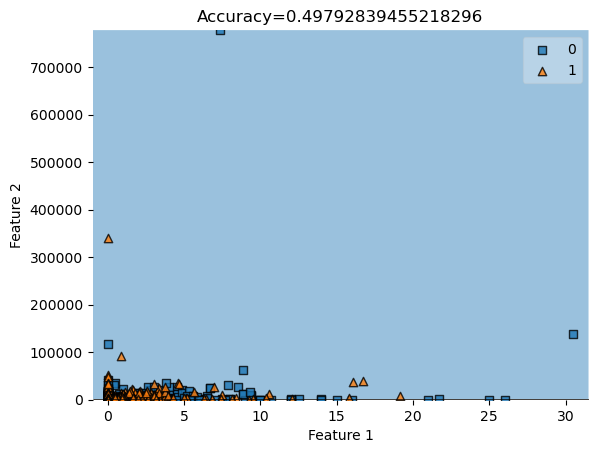

In [17]:
y_train = y_train.reshape(-1)
plot_decision_regions(X_train, y_train, clf=NR
                    #   filler_feature_values={2:value},
                    #   filler_feature_ranges={2:width}
                      )
mypredict = NR.predict(X_train)
title = plt.gca().set(title=f"Accuracy={(mypredict==y_train).mean()}",
                      xlabel="Feature 1",
                      ylabel="Feature 2")

In [18]:
LR = LogisticRegression().fit(X_train, y_train)

In [19]:
LR.score(X_train, y_train)

0.5189829327760362

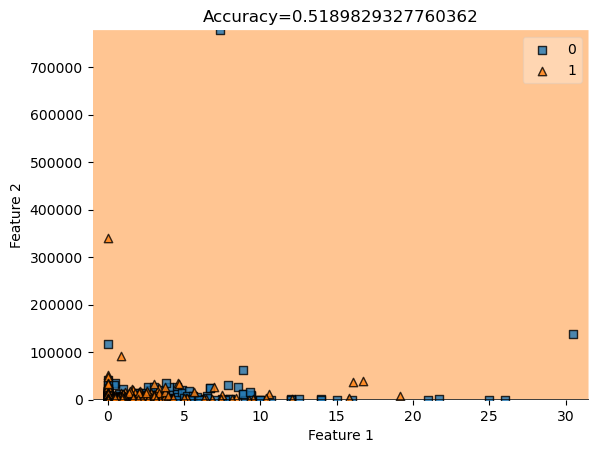

In [20]:
plot_decision_regions(X_train, y_train, clf=LR)
mypredict = LR.predict(X_train)
title = plt.gca().set(title=f"Accuracy={(mypredict==y_train).mean()}",
                      xlabel="Feature 1",
                      ylabel="Feature 2")

In [21]:
mySVC = SVC(kernel="sigmoid", gamma="auto", shrinking=False)
mySVC.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid', shrinking=False)

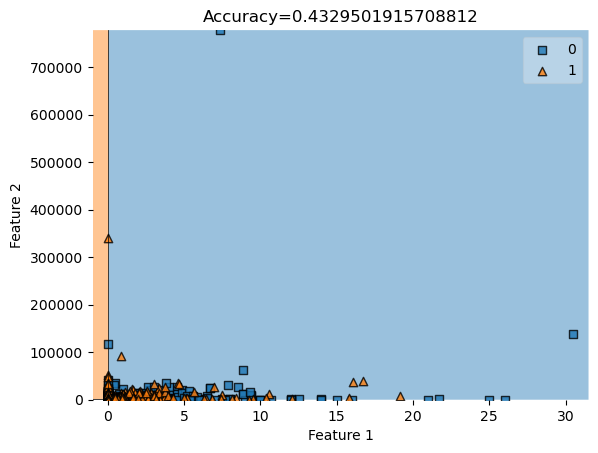

In [22]:
from final_project_code import Newton_Raphson 
NR2 = Newton_Raphson()
NR2.simple_plot(model = mySVC, X = X_train, y = y_train)
print("SVC")

In [23]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train, y_train)
DTree.score(X_train, y_train)

0.985022640195054

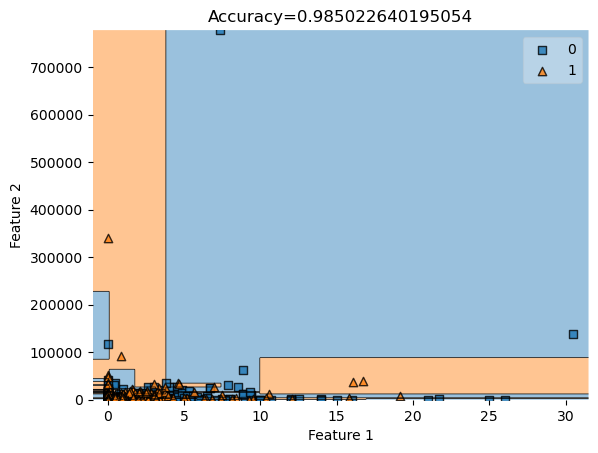

In [24]:
NR2.simple_plot(DTree, X_train, y_train)

In [26]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest.score(X_train, y_train)

0.985022640195054

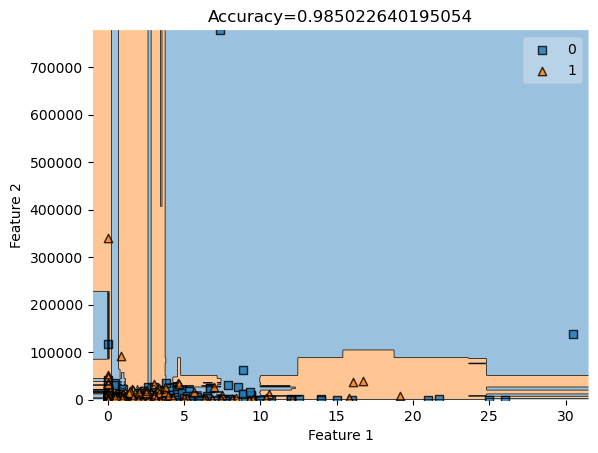

In [27]:
NR2.simple_plot(RandomForest, X_train, y_train)

In [ ]:
SVC2 = SVC(kernel="poly", )